In [590]:
import numpy as np
import pandas as pd
import mysql.connector as sqlconn
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm 
from sklearn.linear_model import LinearRegression
import warnings

warnings.filterwarnings('ignore')


### Create Connection

In [591]:
myconn = sqlconn.connect(
    host = 'localhost',
    user = 'root',
    password = '',
    port = '3306',
    database = 'air_temp'
)

### Query

In [592]:
curs = myconn.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel = pd.DataFrame(result, columns=curs.column_names)
    return tabel

In [593]:
tabel = sql_table(
    '''
    select *
    from percent_50
    '''
)

tabel.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,None,64.40


### Convert table into a DataFrame

In [594]:
df = pd.DataFrame(tabel, columns = ("id", "air_temp", "actual_temp"))
df.head()

,id,air_temp,actual_temp
0,1,64.76,64.76
1,2,None,63.86
2,3,64.22,64.22
3,4,None,64.40
4,5,None,64.40


### Check info

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           60 non-null     int64 
 1   air_temp     30 non-null     object
 2   actual_temp  60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


### Change air_temp and actual_temp to float64

In [596]:
# Change air_temp and actual_temp to float64
df['air_temp'] = pd.to_numeric(df['air_temp'])
df['actual_temp'] = pd.to_numeric(df['actual_temp'])

### Re-check info

In [597]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60 non-null     int64  
 1   air_temp     30 non-null     float64
 2   actual_temp  60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


### Check duplicated

In [598]:
df[df.duplicated()]

,id,air_temp,actual_temp


### Check null value

In [599]:
df.isnull().sum()

id              0
air_temp       30
actual_temp     0
dtype: int64

### Data Visualization & Statistics

In [600]:
# reshape
x = df['id'].values.reshape(-1,1)
y = df['actual_temp'].values

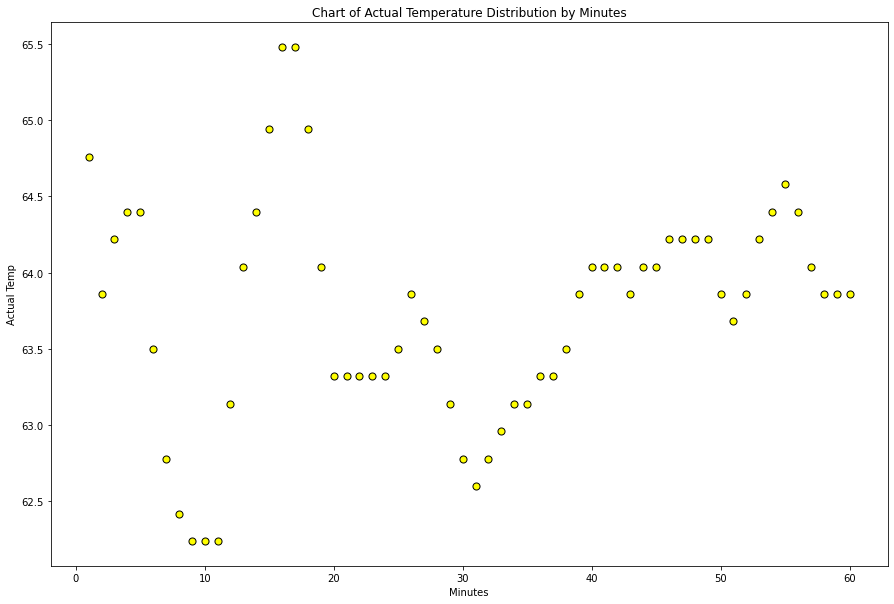

In [601]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(x,y, s = 50, color = 'yellow', edgecolor = 'k')
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Actual Temperature Distribution by Minutes')
plt.show()

In [602]:
# Call the classifier
reg = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

print('Shape of X train : ', X_train.shape)
print('Shape of y train : ', y_train.shape)

print('Shape of X test : ', X_test.shape)
print('Shape of y test : ', y_test.shape)

Shape of X train :  (30, 1)
Shape of y train :  (30,)
Shape of X test :  (30, 1)
Shape of y test :  (30,)


In [603]:
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)
print('Y Pred: ', y_pred)

Y Pred:  [63.63289199 63.81053748 63.80165521 63.76612611 63.82830203 64.01482979
 63.65065654 63.68618564 64.02371207 63.84606658 63.85494885 63.9793007
 63.65953881 63.59736289 63.99706524 63.73947928 63.93488932 63.88159568
 63.8371843  63.79277293 63.78389066 63.67730336 63.92600705 63.97041842
 63.57071607 63.57959834 63.70395019 63.73059701 64.06812344 64.00594752]


In [604]:
y_pred = np.round_(y_pred, decimals = 2)
print ('Rounded values : ', y_pred)

Rounded values :  [63.63 63.81 63.8  63.77 63.83 64.01 63.65 63.69 64.02 63.85 63.85 63.98
 63.66 63.6  64.   63.74 63.93 63.88 63.84 63.79 63.78 63.68 63.93 63.97
 63.57 63.58 63.7  63.73 64.07 64.01]


In [605]:
print('Y Test: ', y_test)

Y Test:  [62.24 63.14 63.5  63.32 62.6  63.86 62.24 64.94 64.22 62.96 63.14 64.22
 63.14 64.4  63.86 63.32 63.86 63.32 62.78 63.68 63.86 64.4  64.04 64.22
 63.86 64.22 65.48 63.32 63.86 63.68]


In [606]:
print('Y Train: ', y_train)

Y Train:  [64.04 63.86 65.48 63.86 63.86 64.94 63.32 62.78 64.4  64.22 64.22 64.04
 64.4  64.04 64.04 62.78 63.5  63.5  63.5  64.58 64.04 62.42 64.76 63.14
 63.32 64.04 64.04 63.32 62.24 64.4 ]


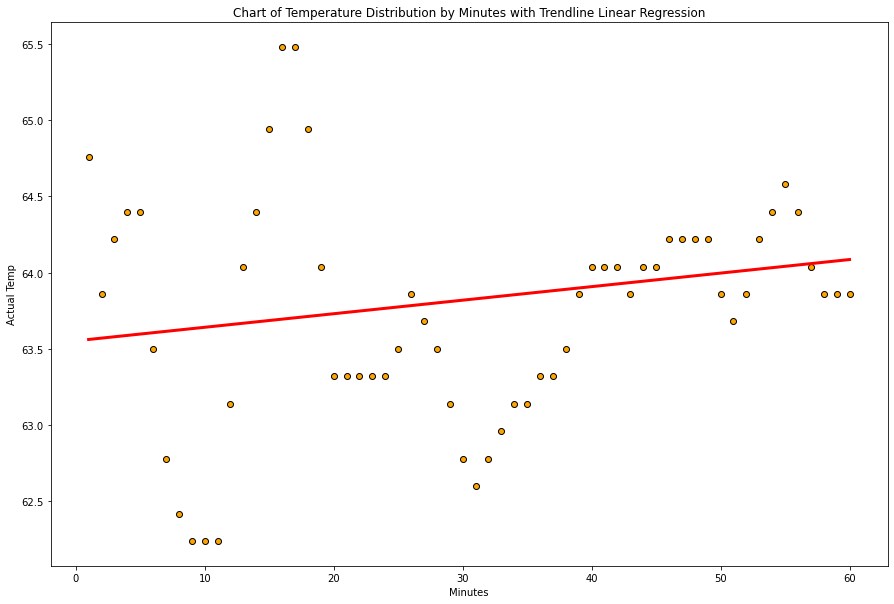

In [607]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(x, y, color = 'orange', edgecolor = 'k')
plt.plot(x, reg.predict(x), color = 'red', linewidth = 3)
plt.xlabel('Minutes')
plt.ylabel('Actual Temp')
plt.title('Chart of Temperature Distribution by Minutes with Trendline Linear Regression')
plt.show()

### Calculating MSE. The lower value, the better it is. 0 means perfect prediction

In [608]:
# Rata-rata kesalahan kuadrat diantara nilai aktual dan nilai peramalan. 
# Digunakan untuk mengecek estimasi berapa nilai kesalahan pada peramalan
# MSE mendekati nol menunjukkan bahwa hasil peramalan sesuai dengan data aktual
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set :', mse)

Mean squared error of testing set : 0.5432166666666671


### Calculating MAE

In [609]:
# Rata-rata selisih mutlak nilai sebenarnya (aktual) dengan nilai prediksi (peramalan)
# Digunakan sebagai indikasi ketidakpastian pengukuran
# Mengukur keakuratan suatu model statistik dalam melakukan prediksi atau peramalan
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set : ', mae)

Mean absolute error of testing set :  0.5796666666666674


### Evaluate Model Performance

In [610]:
print('Training Accuracy :', reg.score(X_train, y_train))  
print('Testing Accuracy :', reg.score(X_test, y_test))  

Training Accuracy : 0.052171919459332305
Testing Accuracy : -0.057904348671121264


### Save y_pred into DataFrame


In [611]:
df_y = pd.DataFrame(y_pred)

df_y.head()

,0
0,63.63
1,63.81
2,63.80
3,63.77
4,63.83


### Query and Slicing Data based on air_temp

In [612]:
new_tabel = sql_table(
    '''
    SELECT * FROM `air_temp`.`percent_50` WHERE `air_temp` IS NULL LIMIT 0,1000
    '''
)

In [613]:
second_tabel = sql_table(
    '''
    SELECT * FROM `air_temp`.`percent_50` WHERE `air_temp` IS NOT NULL LIMIT 0,1000
    '''
)

In [614]:
# DataFrame with air_temp is NULL
df = pd.DataFrame(new_tabel, columns = ("id", "air_temp", "actual_temp"))
print("DataFrame with air_temp is NULL")
df.head()

DataFrame with air_temp is NULL


,id,air_temp,actual_temp
0,2,None,63.86
1,4,None,64.40
2,5,None,64.40
3,7,None,62.78
4,10,None,62.24


In [615]:
# DataFrame with air_temp is NOT NULL 
df2 = pd.DataFrame(second_tabel, columns = ("id", "air_temp", "actual_temp"))
print("DataFrame with air_temp is NOT NULL")
df2.head()

DataFrame with air_temp is NOT NULL


,id,air_temp,actual_temp
0,1,64.76,64.76
1,3,64.22,64.22
2,6,63.50,63.50
3,8,62.42,62.42
4,9,62.24,62.24


#### Impute y_pred values into DataFrame which air_temp is NULL

In [616]:
df[df.columns[1]] = df_y[df_y.columns[0]].copy()

#### Re-check DataFrame after imputation

In [617]:
df.head()

,id,air_temp,actual_temp
0,2,63.63,63.86
1,4,63.81,64.40
2,5,63.80,64.40
3,7,63.77,62.78
4,10,63.83,62.24


#### Merge imputation dataframes with Non-NULL DataFrames. Then sorted by ID

In [618]:
mergedRes = pd.merge(df,df2, how = 'outer')
mergedRes = mergedRes.sort_values(by = 'id')
mergedRes.head()

,id,air_temp,actual_temp
30,1,64.76,64.76
0,2,63.63,63.86
31,3,64.22,64.22
1,4,63.81,64.40
2,5,63.8,64.40


In [619]:
mergedRes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 30 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           60 non-null     int64 
 1   air_temp     60 non-null     object
 2   actual_temp  60 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


#### Convert air_temp & actual_temp to int/float datatypes

In [620]:
mergedRes['air_temp'] = pd.to_numeric(mergedRes['air_temp'])
mergedRes['actual_temp'] = pd.to_numeric(mergedRes['actual_temp'])

#### Re-check info

In [621]:
mergedRes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 30 to 59
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           60 non-null     int64  
 1   air_temp     60 non-null     float64
 2   actual_temp  60 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


#### Visualization after imputation

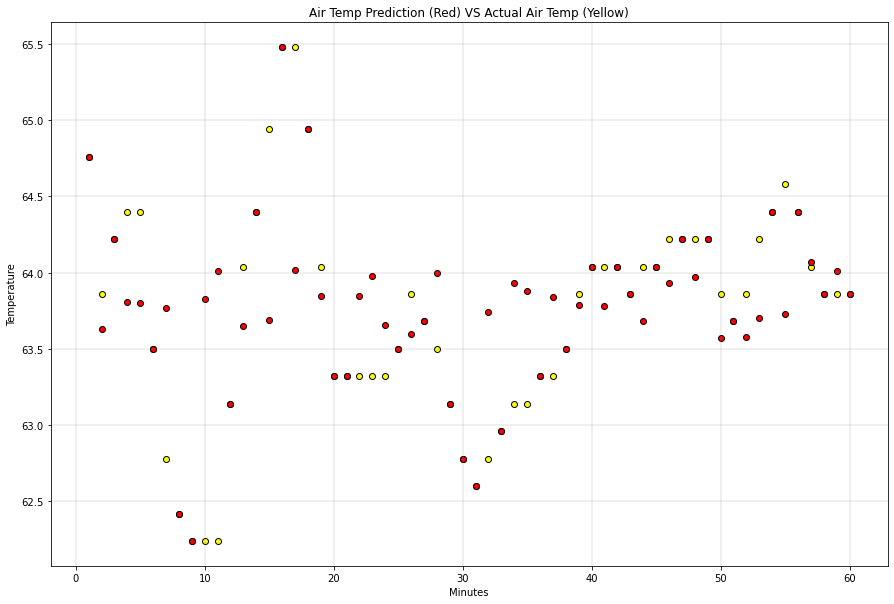

In [622]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.scatter(mergedRes['id'], mergedRes['actual_temp'], color = 'yellow', edgecolor = 'k')
plt.scatter(mergedRes['id'], mergedRes['air_temp'], color = 'red', edgecolor = 'k')
ax.grid(color = 'grey', linestyle = '-', linewidth = 0.25, alpha = 1)
plt.xlabel('Minutes')
plt.ylabel('Temperature')
plt.title('Air Temp Prediction (Red) VS Actual Air Temp (Yellow)')
plt.show()

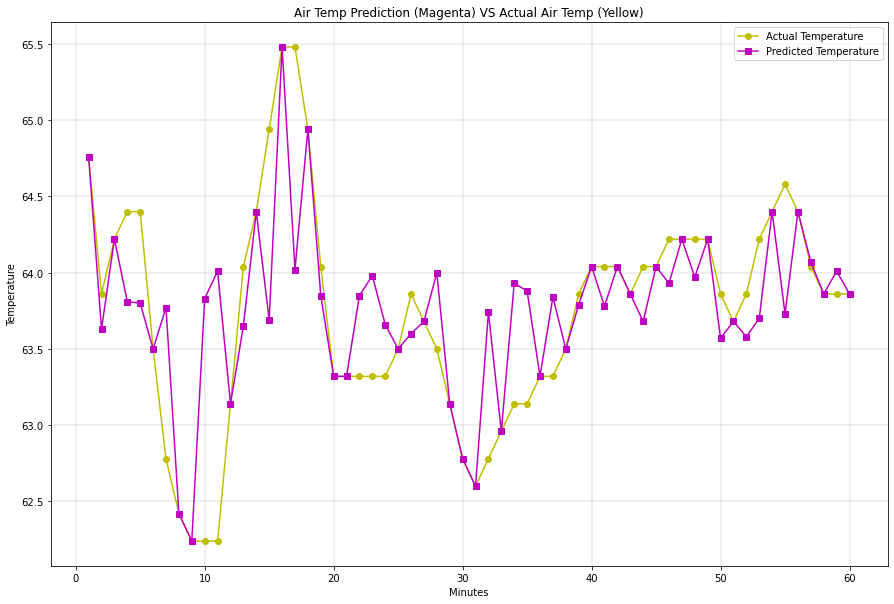

In [623]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(mergedRes['id'], mergedRes['actual_temp'], 'y-o', label = 'Actual Temperature')
plt.plot(mergedRes['id'], mergedRes['air_temp'], 'm-s', label = 'Predicted Temperature')
ax.grid(color = 'grey', linestyle = '-', linewidth = 0.25, alpha = 1)
plt.xlabel('Minutes')
plt.ylabel('Temperature')
plt.title('Air Temp Prediction (Magenta) VS Actual Air Temp (Yellow)')
ax.legend()
plt.show()

#### Export latest DataFrame into a CSV File

In [624]:
mergedRes.to_csv (r'C:\Users\USER\Downloads\Project\air-temperature-prediction\export_dataframe_50%.csv', index = False, header = True)